# Social Network advertisement

For Downloading the Dataset (https://github.com/shubh2002/DataSets)

Social Network advertisement impacts on purchasing of products . Based on the pattern ,one can find whether the customer has purchased the product or not.



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Social network advertisement.csv')

In [3]:
df.shape

(400, 5)

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


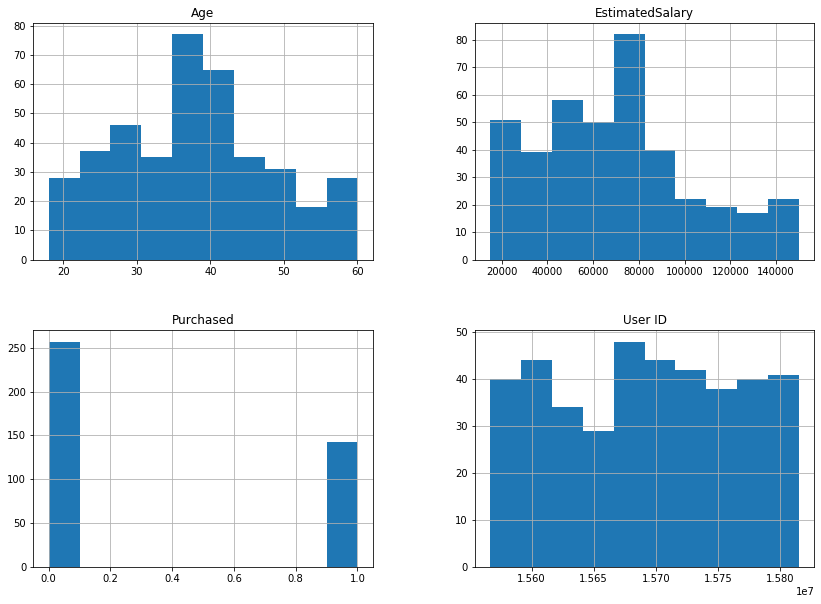

In [6]:
df.hist(figsize=(14,10))
plt.show()

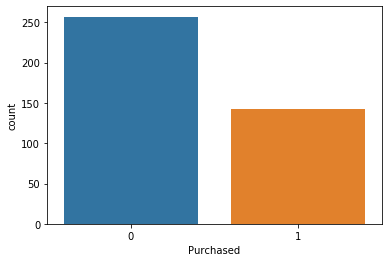

In [7]:
sns.countplot(x='Purchased',data=df)

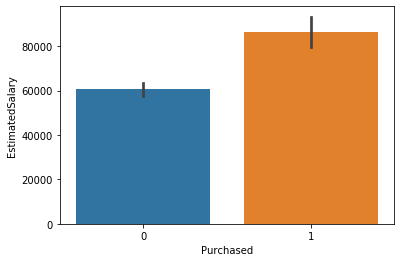

In [8]:
sns.barplot(y='EstimatedSalary',x='Purchased',data=df)

User ID               AxesSubplot(0.125,0.125;0.168478x0.755)
Age                AxesSubplot(0.327174,0.125;0.168478x0.755)
EstimatedSalary    AxesSubplot(0.529348,0.125;0.168478x0.755)
Purchased          AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

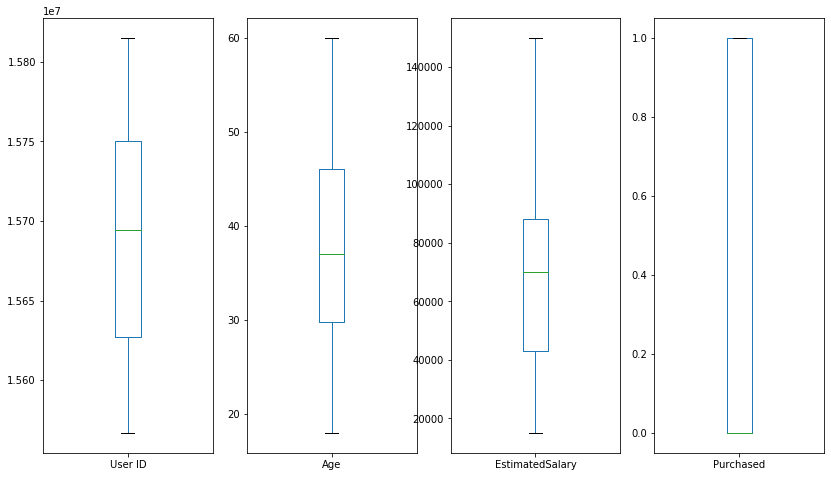

In [9]:
df.plot(kind='box',subplots=True,figsize=(14,8))

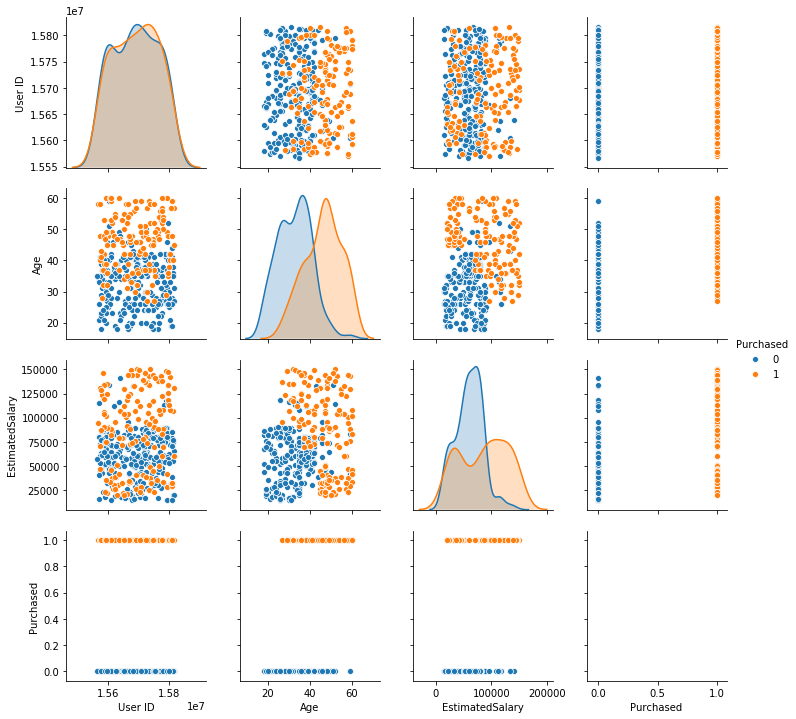

In [10]:
sns.pairplot(data=df,hue='Purchased')

In [11]:
df=df.drop(['User ID'],axis=1)

In [12]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [13]:
from sklearn.preprocessing import LabelEncoder
encoding=LabelEncoder()
df['Gender']=encoding.fit_transform(df['Gender'])

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [15]:
x=df.iloc[:,df.columns!='Purchased']
x.shape

(400, 3)

In [16]:
y=df.iloc[:,df.columns=='Purchased']
y.shape

(400, 1)

In [17]:
"""Scaling the data"""
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler(feature_range=(0,5))
x_scaled=scaling.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [21]:
model1=LogisticRegression()
model2=GaussianNB()
model3=KNeighborsClassifier()
model4=DecisionTreeClassifier()
model5=SVC()
model6=RandomForestClassifier()
model7=AdaBoostClassifier()
model8=GradientBoostingClassifier()
model9=XGBClassifier()
models=[model1,model2,model3,model4,model5,model6,model7,model8,model9]

In [22]:
accuracy=[]
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy.append(acc)

In [23]:
Final_Score=pd.DataFrame({'MODELS':models,'ACCURACY':accuracy})

In [24]:
Final_Score.sort_values(by='ACCURACY',ascending=False)

,MODELS,ACCURACY
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.93
4,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.93
2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.92
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.92
6,"(DecisionTreeClassifier(class_weight=None, cri...",0.91
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.89
0,"LogisticRegression(C=1.0, class_weight=None, d...",0.87
5,"(DecisionTreeClassifier(class_weight=None, cri...",0.85
3,"DecisionTreeClassifier(class_weight=None, crit...",0.84
